# Team DatenWelle

## Exploratory data analysis

This notebook loads the data from JSON format and performs some initial clean-up and visualisation tasks

In [292]:
#!git pull
#!git status
#!git add 1-anya_exploratory_analysis.ipynb
#!git commit -m 'added code to find 2019-2022 chunck of data'
#!git push
#!pip install -r ../requirements.txt

#after installed new libraries
#!pip freeze > requirements.txt
#!git add requirements.txt
#!git commit -m 'added library x'
#!git push 

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 313 bytes | 313.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:S2DSLondon/Spring23_DW.git
   2f86a33..f5544e6  main -> main


In [2]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Opening JSON file
f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

df = pd.DataFrame.from_dict(data)

#print(df.head())

         id                                               name  \
0  16489913                 UN imposes sanctions on DRC rebels   
1  16489912            Catholic Church abuse hotline goes cold   
2  16489903  "Fiscal cliff" tax hikes go into effect in the US   
3  16490025  Kim seeks reconciliation with South, economic ...   
4  16490029  Senate-approved fiscal deal faces House consid...   

                    shortTitle  \
0      UN sanctions DRC rebels   
1                 Disconnected   
2  US goes over "fiscal cliff"   
3    A rare New Year's address   
4   US House mulls fiscal deal   

                                                text  \
0  <p>\n\tThe UN Security Council has sanctioned ...   
1  <p>\n\tFor two and a half years, the counselin...   
2  <p>\n\tAs the clock struck midnight in Washing...   
3  <p>\n\tKim Jong Un, who came to office just ov...   
4  <p>\n\tLess than two hours after the US had of...   

                                              teaser  \
0  A 

In [134]:
df_copy= df.copy()
#general info on the data
#df.info()

df_subset=df[['id','name','lastModifiedDate','keywords','keywordStrings','thematicFocusCategory']]
#df_subset.info()

df_subset[df_subset['id'=='60278']]


KeyError: False

In [5]:
df.isnull().sum()


id                            0
name                          0
shortTitle                    0
text                          0
teaser                        0
shortTeaser                   0
kicker                   105569
regions                       0
keywords                      0
keywordStrings                0
thematicFocusCategory     95746
navigations                   0
categories                    0
departments                   0
firstPublicationDate     133589
lastModifiedDate              0
contentDate                   0
relatedAutoTopics             0
contentLinks                  0
articles                      0
isOpinion                     0
geographicLocations       25294
contentAssociations           0
mainContentImageLink       5295
images                        0
externalLinks                 0
topStory                      0
language                 150365
dtype: int64

In [6]:
#sns.countplot(y=df.isnull().sum(),data=df)

#### Finding the subset of the data for 1 Jan 2019 - 1 Jan 2020 based on lastModifiedDate

In [267]:
datetimes = pd.to_datetime(df['lastModifiedDate'])
df['ts_lastModifiedDate']=datetimes
#df.iloc[ts_start]['ts_lastModifiedDate']


#find start index for subset 2019-2022
ts_start=datetimes[(datetimes > pd.Timestamp(year=2019, month=1, day=1).tz_localize('utc')) 
          & (datetimes < pd.Timestamp(year=2019, month=1, day=2).tz_localize('utc'))].min()
print(ts_start)
#find end date for subset 2019-2022
ts_end=datetimes[(datetimes > pd.Timestamp(year=2022, month=1, day=1).tz_localize('utc')) 
          & (datetimes < pd.Timestamp(year=2022, month=1, day=2).tz_localize('utc'))].min()
print(ts_end)

start_date=datetimes[datetimes == ts_start]
end_date=datetimes[datetimes == ts_end]

#find index for the chosen start and end dates
start_index=start_date.index[0]
print(start_index)
df[df.index == start_date.index[0]]

end_index=end_date.index[0]
print(end_index)
df[df.index == end_date.index[0]]

df_subset=df[start_index:end_index]


2019-01-01 03:57:28.904000+00:00
2022-01-01 02:35:51.098000+00:00
60278
150367


,id,name,shortTitle,text,teaser,shortTeaser,kicker,regions,keywords,keywordStrings,...,articles,isOpinion,geographicLocations,contentAssociations,mainContentImageLink,images,externalLinks,topStory,language,ts_lastModifiedDate
150367,60306089,Belgium: Gas explosion in Turnhout kills three,Belgium: Gas explosion in Turnhout kills three,<p>At least three people died in a suspected g...,A woman was freed from the rubble on Friday ni...,A woman was freed from the rubble on Friday ni...,,[{'name': 'Belgium'}],"[{'name': 'Belgium'}, {'name': 'explosion'}, {...","[Belgium, explosion, apartment building]",...,[],False,None,"[{'id': 59566596}, {'id': 59566603}, {'id': 59...",{'description': 'Three people were confirmed d...,"[{'name': 'Belgien I Explosion in Turnhout'}, ...",[],False,ENGLISH,2022-01-01 02:35:51.098000+00:00


In [269]:
#start id
print('start id is '+str( df.iloc[int(start_index)]['id'] )+'\n' )

#print(end_date)
print('end id is '+str(df.iloc[int(end_index)]['id'])+'\n') #60305852

start id is 46912921

end id is 60306089



In [280]:
df_subset=df[start_index:end_index]

,id,name,shortTitle,text,teaser,shortTeaser,kicker,regions,keywords,keywordStrings,...,articles,isOpinion,geographicLocations,contentAssociations,mainContentImageLink,images,externalLinks,topStory,language,ts_lastModifiedDate
60278,46912921,"NASA spacecraft enters asteroid Bennu's orbit,...","NASA craft enters asteroid orbit, sets records",<p>NASA's unmanned spacecraft OSIRIS-REx enter...,The OSIRIS-REx spacecraft had arrived at the l...,NASA said its OSIRIS-REx spacecraft succesfull...,,[],"[{'name': 'NASA'}, {'name': 'OSIRIS-REx'}, {'n...","[NASA, OSIRIS-REx, Bennu, asteroid]",...,"[{'name': 'After two-year journey, NASA Osiris...",False,[],"[{'id': 47376129}, {'id': 47376131}, {'id': 47...",{'description': None},[{'name': 'Sonde «Osiris Rex» nach zwei Jahren...,[{'name': 'DW Newsletter'}],False,None,2019-01-01 03:57:28.904000+00:00
60279,46911356,UK brings in boats to patrol English Channel a...,UK deploys boats amid Channel migration spike,<p>Britain will recall two overseas border pat...,The UK is withdrawing patrol ships from overse...,The UK is withdrawing patrol ships from overse...,,[],"[{'name': 'English Channel'}, {'name': 'migrat...","[English Channel, migration, boats, illegal im...",...,[{'name': '40 migrants rescued from boats in E...,False,[],"[{'id': 47375206}, {'id': 47375208}, {'id': 47...",{'description': None},[{'name': 'Großbritanien | Zahl der Bootsflüch...,[],False,None,2019-01-01 06:11:50.527000+00:00
60280,46909694,"In Brazil, Jair Bolsonaro tries to unite the e...",Can Bolsonaro unite Brazil's motley right?,<p>Politics without ideologies and party cliqu...,Brazil is inaugurating President Jair Bolsonar...,"In his campaign, Jair Bolsonaro targeted appea...",,[],"[{'name': 'Brazil'}, {'name': 'Jair Bolsonaro'...","[Brazil, Jair Bolsonaro, Chicago economics, Ha...",...,[{'name': 'Bolsonaro's policies divide Afro-Br...,False,[],"[{'id': 47373913}, {'id': 47374152}, {'id': 47...",{'description': None},[{'name': 'Brasilien - Präsident Jair Bolsonar...,[{'name': ''}],False,None,2019-01-01 06:14:35.563000+00:00
60281,46912694,Tokyo: Man deliberately drives van into NYE cr...,Man drives car into Tokyo NYE crowd,<p>At least nine people were injured when a ma...,"A man with an ""intent to murder"" has driven a ...","A man with an ""intent to murder"" has driven a ...",,[],"[{'name': 'Japan'}, {'name': 'Tokyo'}, {'name'...","[Japan, Tokyo, Harajuku, attack]",...,[],False,[],"[{'id': 47376009}, {'id': 47376011}, {'id': 47...",{'description': None},[{'name': 'Japan | Autoangriff in Tokyo'}],[],False,None,2019-01-01 08:26:11.599000+00:00
60282,46910092,Bangladesh opposition leader: International co...,International community 'shouldn't recognize n...,"<div class=""vjs-wrapper embed big ""><h2 aria-l...","In an exclusive interview with DW, Kamal Hossa...",Bangladeshi opposition leader Kamal Hossain sl...,,[],"[{'name': 'Asia'}, {'name': 'Bangladesh'}, {'n...","[Asia, Bangladesh, elections, Kamal Hossain, S...",...,[{'name': 'Opinion: Bangladesh's missed chance...,False,[],"[{'id': 47374183}, {'id': 47374251}, {'id': 47...",{'description': None},"[{'name': 'Dr. Kamal Hossain '}, {'name': 'Pre...",[],False,None,2019-01-01 09:05:00.736000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150363,45312684,Fitch ratings agency revises Italy debt outloo...,Ratings agency issues warning on Italy debt,<p>The Italian populist government's plans to ...,Italy's governing 5-Star party is on track to ...,The governing 5-Star party is on track to trip...,,[],"[{'name': 'Italy'}, {'name': 'Fitch'}, {'name'...","[Italy, Fitch, debt, M5S, The League]",...,[{'name': 'ECB pulls plug on eurozone stimulus...,False,[],"[{'id': 46037381}, {'id': 46037383}, {'id': 46...",{'description': None},[{'name': 'USA New York - Fitch Ratingagentur'...,[{'name': 'DW Newsletter'}],False,None,2018-08-31 21:45:11.895000+00:00
150364,45304664,Angela Merkel in Nigeria: Migration in focus a...,"Merkel talk terrors

## Exploring Focus Categories column

In [10]:

#df['thematicFocusCategory'].astype(str).unique()
#Exporting dictionary into the array of 'clean' focus categories
focus_clean = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)
focus_clean.unique()

array([None, 'History', 'Business', 'Conflicts', 'Politics', 'Culture',
       'Society', 'Education', 'Digital World', 'Sports', 'Crime',
       'Lifestyle', 'Religion', 'Human Rights', 'Science', 'Music',
       'Law and Justice', 'Terrorism', 'Nature and Environment', 'Film',
       'Travel', 'Media', 'Technology', 'Soccer', 'Learning German',
       'Catastrophe', 'Cars and Transportation', 'Health', 'Literature',
       'Arts', 'Architecture', 'Dance', 'Design', 'Theater', 'Migration',
       'Freedom of Speech', 'Trade', 'Rule of Law', 'Press Freedom',
       'Offbeat', 'Equality', 'Climate', 'Corruption', 'Diversity',
       'Innovation', 'Globalization', 'Food Security'], dtype=object)

In [11]:
# Amount of articles per FocusCategory
focus_clean.value_counts()

Politics                   24923
Sports                      6546
Business                    6295
Culture                     5699
Society                     4809
Conflicts                   4568
Nature and Environment      4260
Crime                       3548
Health                      2781
Law and Justice             1783
Catastrophe                 1740
Media                       1740
Science                     1499
Travel                      1416
Human Rights                1254
Music                        846
Terrorism                    829
History                      659
Religion                     619
Technology                   515
Film                         414
Soccer                       405
Education                    384
Cars and Transportation      352
Lifestyle                    335
Arts                         321
Literature                   244
Migration                    223
Press Freedom                219
Digital World                119
Rule of La

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, 'History'),
  Text(0, 1, 'Business'),
  Text(0, 2, 'Conflicts'),
  Text(0, 3, 'Politics'),
  Text(0, 4, 'Culture'),
  Text(0, 5, 'Society'),
  Text(0, 6, 'Education'),
  Text(0, 7, 'Digital World'),
  Text(0, 8, 'Sports'),
  Text(0, 9, 'Crime'),
  Text(0, 10, 'Lifestyle'),
  Text(0, 11, 'Religion'),
  Text(0, 12, 'Human Rights'),
  Text(0, 13, 'Science'),
  Text(0, 14, 'Music'),
  Text(0, 15, 'Law and Justice'),
  Text(0, 16, 'Terrorism'),
  Text(0, 17, 'Nature and Environment'),
  Text(0, 18, 'Film'),
  Text(0, 19, 'Travel'),
  Text(0, 20, 'Media'),
  Text(0, 21, 'Technology'),
  Text(0, 22, 'Soccer'),
  Text(0, 23, 'Learning German'),
  Text(0, 24, 'Catastrophe'),
  Text(0, 25, 'Cars and Transportation'),
  Text(0, 26, 'Health'),
  Text(0, 27, 'Literature'),
  Text

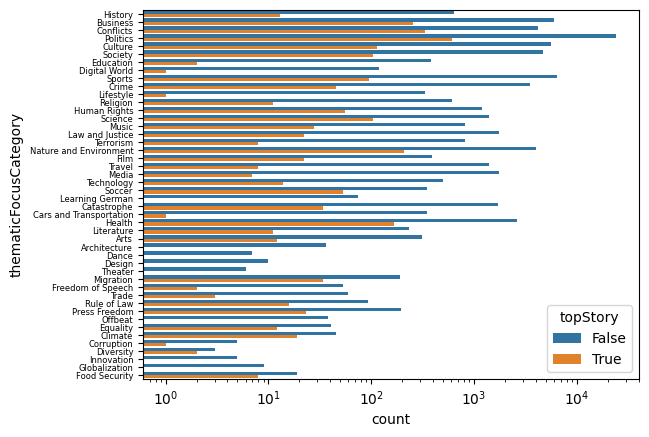

In [12]:
#Plotting amount of TopStories across FocusCategories
sns.countplot(y=focus_clean, hue='topStory', data=df)
plt.xscale('log')
plt.yticks(fontsize=6)#, rotation=90)

### Keywords exploration

In [13]:
df['keywords'] # is keywords in dictionary

0         [{'name': 'DRC'}, {'name': 'M23'}, {'name': 'F...
1         [{'name': 'telephone'}, {'name': 'hotline'}, {...
2         [{'name': 'fiscal cliff'}, {'name': 'Obama'}, ...
3         [{'name': 'Kim Jong Un'}, {'name': 'Kim Jong I...
4         [{'name': 'fiscal cliff'}, {'name': 'US Senate...
                                ...                        
175654    [{'name': 'Turkey'}, {'name': 'Recep Tayipp Er...
175655    [{'name': 'pollution'}, {'name': 'gold mine'},...
175656    [{'name': 'war'}, {'name': 'Ukraine'}, {'name'...
175657    [{'name': 'France'}, {'name': 'vegetarian'}, {...
175658          [{'name': 'Ecuador'}, {'name': 'protests'}]
Name: keywords, Length: 175659, dtype: object

In [14]:
df['keywords'].isna().sum()


0

In [15]:
def get_keywords(row):
    if row is None:
        return None
    else:
        res_list = []
        for name_dict in row:
            res_list.append(name_dict['name'])
        return res_list

lists_kw=df['keywords'].apply(get_keywords)

In [16]:
list(df['keywordStrings'].values)

[['DRC', 'M23', 'FDLR', 'Rwanda', 'Susan Rice', 'UN security council'],
 ['telephone',
  'hotline',
  'helpline',
  'Catholic Church',
  'federal government',
  'abuse',
  'sexual violence'],
 ['fiscal cliff',
  'Obama',
  'congress',
  'spending cuts',
  'senate',
  'debt ceiling'],
 ['Kim Jong Un',
  'Kim Jong Il',
  'Kim Il Sung',
  'lee myung-bak',
  'park Guen-hye',
  'north korea',
  'south korea',
  'pyongyang',
  'Seoul'],
 ['fiscal cliff',
  'US Senate',
  'Senate vote',
  'fiscal cliff bill',
  'recession'],
 ['ireland', 'european union', 'cyprus', 'enda kenny', 'cyprus'],
 ['pakistan', 'taliban', 'aid workers'],
 ['New Year',
  'celebrations',
  'Australia',
  'fireworks',
  'Kylie Minogue',
  'Scotland',
  'Burma',
  'Hong Kong',
  'Christmas Island'],
 ['Myanmar',
  'Burma',
  'tourism',
  'sustainable tourism',
  'trips to Asia',
  'travelling in Asia',
  'travels',
  'vacation',
  'German tourists'],
 ['China', 'Wen Jiabao', 'New York Times', 'journalist', 'Australia'],


In [17]:
lists_kw[:10]


0    [DRC, M23, FDLR, Rwanda, Susan Rice, UN securi...
1    [telephone, hotline, helpline, Catholic Church...
2    [fiscal cliff, Obama, congress, spending cuts,...
3    [Kim Jong Un, Kim Jong Il, Kim Il Sung, lee my...
4    [fiscal cliff, US Senate, Senate vote, fiscal ...
5    [ireland, european union, cyprus, enda kenny, ...
6                     [pakistan, taliban, aid workers]
7    [New Year, celebrations, Australia, fireworks,...
8    [Myanmar, Burma, tourism, sustainable tourism,...
9    [China, Wen Jiabao, New York Times, journalist...
Name: keywords, dtype: object

In [18]:
import functools
import operator
functools.reduce(operator.add, lists_kw[:10])

['DRC',
 'M23',
 'FDLR',
 'Rwanda',
 'Susan Rice',
 'UN security council',
 'telephone',
 'hotline',
 'helpline',
 'Catholic Church',
 'federal government',
 'abuse',
 'sexual violence',
 'fiscal cliff',
 'Obama',
 'congress',
 'spending cuts',
 'senate',
 'debt ceiling',
 'Kim Jong Un',
 'Kim Jong Il',
 'Kim Il Sung',
 'lee myung-bak',
 'park Guen-hye',
 'north korea',
 'south korea',
 'pyongyang',
 'Seoul',
 'fiscal cliff',
 'US Senate',
 'Senate vote',
 'fiscal cliff bill',
 'recession',
 'ireland',
 'european union',
 'cyprus',
 'enda kenny',
 'cyprus',
 'pakistan',
 'taliban',
 'aid workers',
 'New Year',
 'celebrations',
 'Australia',
 'fireworks',
 'Kylie Minogue',
 'Scotland',
 'Burma',
 'Hong Kong',
 'Christmas Island',
 'Myanmar',
 'Burma',
 'tourism',
 'sustainable tourism',
 'trips to Asia',
 'travelling in Asia',
 'travels',
 'vacation',
 'German tourists',
 'China',
 'Wen Jiabao',
 'New York Times',
 'journalist',
 'Australia']

In [19]:
#functools.reduce(operator.add, lists_kw)

In [20]:
#create series of sets
def get_keywords(row):
    if row is None:
        return None
    else:
        res_set = set()
        for name_dict in row:
            res_set.add(name_dict['name'])
        return res_set

df['keywords'].apply(get_keywords)

0         {Susan Rice, UN security council, FDLR, Rwanda...
1         {federal government, Catholic Church, sexual v...
2         {congress, senate, Obama, fiscal cliff, debt c...
3         {Kim Il Sung, park Guen-hye, Seoul, Kim Jong U...
4         {fiscal cliff bill, Senate vote, fiscal cliff,...
                                ...                        
175654    {Turkey, warning, Recep Tayipp Erdogan, Finlan...
175655     {pollution, Turkey, cyanide, Anagold, gold mine}
175656    {mobilization, Ukraine, soldiers, draft, consc...
175657                 {France, steak, vegetarian, sausage}
175658                                  {protests, Ecuador}
Name: keywords, Length: 175659, dtype: object

In [21]:
sets=df['keywords'].apply(get_keywords)

In [22]:
sets[0:10]

0    {Susan Rice, UN security council, FDLR, Rwanda...
1    {federal government, Catholic Church, sexual v...
2    {congress, senate, Obama, fiscal cliff, debt c...
3    {Kim Il Sung, park Guen-hye, Seoul, Kim Jong U...
4    {fiscal cliff bill, Senate vote, fiscal cliff,...
5        {ireland, european union, enda kenny, cyprus}
6                     {aid workers, pakistan, taliban}
7    {Hong Kong, Kylie Minogue, fireworks, Australi...
8    {German tourists, trips to Asia, tourism, trav...
9    {Wen Jiabao, Australia, New York Times, journa...
Name: keywords, dtype: object

In [23]:
sets=df['keywords'].apply(get_keywords)
sets=sets[0:10000]
# should work but it is very slow for now with current gpus
kw=functools.reduce(set.union, sets)
kw

{'Viktor',
 'criticism',
 'energy sector overhaus',
 'factory',
 'Bribery',
 'manmohan singh',
 'nielsen',
 'low full-time job rate',
 'bushfires',
 'national socialist underground',
 'The BOBs',
 'Sudan oil',
 'Islamic State of Iraq',
 'LeJ',
 'open access',
 'member',
 'winter prediction',
 'Fernando Alonso',
 'Pürlü',
 'Saxony Anhalt',
 'wagah',
 'wochenmarkt',
 'trade 2012',
 'chemical weapons waste products',
 'beer market',
 'fires',
 'Jack Lew',
 'slaveryfootprint.org',
 'EPL',
 'Martin Schüller',
 'Nick Xenophon detained',
 'Gaza Strip',
 'total economic output',
 'ammunition',
 'costa rica',
 'hijras',
 'security speedomer',
 'reconnect families',
 'professions',
 'rancher',
 'Jagland',
 'raw material supplies',
 'Jurmala',
 'belmokhtar',
 'best friend',
 'Smart Defence',
 'benoni',
 'Mai-Mai',
 'world refugee day',
 'samaras',
 'Fadumo Korn',
 "Seamen's Guild",
 'mit shooting',
 'Djembe',
 'identity',
 'val de fiemme',
 'MDGs',
 'Haft',
 'contraceptive pill',
 'ecuador',
 'th

In [26]:
sets=df['keywords'].apply(get_keywords)
#sets=sets[0:50000]
from tqdm import tqdm
def get_unique_keywords(sets):
    result_set = set()
    for row_set in tqdm(sets.values):
        #result_set.union(row_set)
        result_set = result_set.union(row_set)
    return result_set

unique_keywords = get_unique_keywords(sets)


 34%|███▎      | 59254/175659 [04:52<09:35, 202.29it/s] 


KeyboardInterrupt: 

In [39]:
#len(unique_keywords)
unique_keywords

set()

In [ ]:
keywords=df['keywordStrings'] # is keywords in strings
keywords

0         [DRC, M23, FDLR, Rwanda, Susan Rice, UN securi...
1         [telephone, hotline, helpline, Catholic Church...
2         [fiscal cliff, Obama, congress, spending cuts,...
3         [Kim Jong Un, Kim Jong Il, Kim Il Sung, lee my...
4         [fiscal cliff, US Senate, Senate vote, fiscal ...
                                ...                        
175654    [Turkey, Recep Tayipp Erdogan, Finland Sweden,...
175655     [pollution, gold mine, Turkey, Anagold, cyanide]
175656    [war, Ukraine, Russia, Russian attack, soldier...
175657                 [France, vegetarian, steak, sausage]
175658                                  [Ecuador, protests]
Name: keywordStrings, Length: 175659, dtype: object

In [ ]:
keywords.isna().sum()

0